In [1]:
# commenting so i do not redownload the data again


from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf #yahoofinance data
import pandas_ta  #for technicall analysis 
import warnings
warnings.filterwarnings('ignore')

sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

sp500['Symbol'] = sp500['Symbol'].str.replace('.', '-')  #replace . & -

symbols_list = sp500['Symbol'].unique().tolist()   #get all unique values of symbols

end_date = '2024-04-19'

start_date = pd.to_datetime(end_date)-pd.DateOffset(365*8)

df = yf.download(tickers=symbols_list,
                 start=start_date,
                 end=end_date).stack()

df.index.names = ['date', 'ticker']

df.columns = df.columns.str.lower()       ##make the names as lowercase

# df.to_csv('sp500_data.csv')
# data = pd.read_csv('filename.csv')


[*********************100%%**********************]  503 of 503 completed


In [4]:
df.dropna(axis=0, inplace=True)         ##drop rows that have NaN values
df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2016-05-19 A        41.814316   44.560001   44.820000   43.980000   44.070000   
           AAL      30.896902   32.150002   32.590000   31.690001   32.279999   
           AAPL     21.659697   23.549999   23.660000   23.392500   23.660000   
           ABBV     42.010807   59.279999   60.349998   58.900002   60.060001   
           ABT      32.141998   37.240002   37.680000   36.889999   37.560001   
...                       ...         ...         ...         ...         ...   
2024-04-18 XYL     127.160004  127.160004  128.460007  126.910004  127.160004   
           YUM     137.869995  137.869995  138.330002  137.169998  137.850006   
           ZBH     119.330002  119.330002  121.449997  118.629997  121.449997   
           ZBRA    273.029999  273.029999  277.029999  271.510010  274.000000   
           ZTS     153.110001  153.110001  153.669998  151.169998  151.630005   

Price                   volume  garman_klass_vol        rsi  
date       ticker                                            
2016-05-19 A         3659500.0         -0.000887  72.896788  
           AAL       8875400.0         -0.000349  25.216235  
           AAPL    121768400.0         -0.002949  35.729613  
           ABBV      9917900.0         -0.049052  34.712332  
           ABT       8221300.0         -0.009149  17.866954  
...                        ...               ...        ...  
2024-04-18 XYL       1139200.0          0.000074  52.482884  
           YUM       2178700.0          0.000035  53.599955  
           ZBH       1442300.0          0.000156  37.038986  
           ZBRA       376100.0          0.000198  43.261341  
           ZTS       4772800.0          0.000098  32.095125  

[981964 rows x 8 columns]

Price               adj close       close        high         low        open  \
date       ticker                                                               
2016-05-19 A        41.814316   44.560001   44.820000   43.980000   44.070000   
           AAL      30.896902   32.150002   32.590000   31.690001   32.279999   
           AAPL     21.659697   23.549999   23.660000   23.392500   23.660000   
           ABBV     42.010807   59.279999   60.349998   58.900002   60.060001   
           ABT      32.141998   37.240002   37.680000   36.889999   37.560001   
...                       ...         ...         ...         ...         ...   
2024-04-18 XYL     127.160004  127.160004  128.460007  126.910004  127.160004   
           YUM     137.869995  137.869995  138.330002  137.169998  137.850006   
           ZBH     119.330002  119.330002  121.449997  118.629997  121.449997   
           ZBRA    273.029999  273.029999  277.029999  271.510010  274.000000   
           ZTS     153.110001  153.110001  153.669998  151.169998  151.630005   

Price                   volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2016-05-19 A         3659500.0         -0.000887        NaN       NaN   
           AAL       8875400.0         -0.000349        NaN       NaN   
           AAPL    121768400.0         -0.002949        NaN       NaN   
           ABBV      9917900.0         -0.049052        NaN       NaN   
           ABT       8221300.0         -0.009149        NaN       NaN   
...                        ...               ...        ...       ...   
2024-04-18 XYL       1139200.0          0.000074  52.482884  4.848147   
           YUM       2178700.0          0.000035  53.599955  4.907172   
           ZBH       1442300.0          0.000156  37.038986  4.799888   
           ZBRA       376100.0          0.000198  43.261341  5.623542   
           ZTS       4772800.0          0.000098  32.095125  5.011201   

Price                bb_mid   bb_high       atr      macd  dollar_volume  
date       ticker                                                         
2016-05-19 A            NaN       NaN       NaN       NaN     153.019489  
           AAL          NaN       NaN       NaN       NaN     274.222365  
           AAPL         NaN       NaN       NaN       NaN    2637.466597  
           ABBV         NaN       NaN       NaN       NaN     416.658983  
           ABT          NaN       NaN       NaN       NaN     264.249011  
...                     ...       ...       ...       ...            ...  
2024-04-18 XYL     4.861749  4.875350  0.319225 -0.011253     144.860676  
           YUM     4.930244  4.953316  0.134167  0.020915     300.377358  
           ZBH     4.851432  4.902975 -0.315651 -0.553200     172.109662  
           ZBRA    5.681927  5.740312  0.085150 -0.221304     102.686583  
           ZTS     5.093699  5.176197  1.068310 -3.078152     730.763411  

[981964 rows x 14 columns]

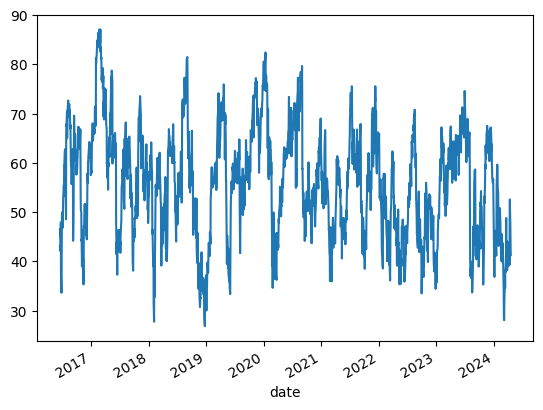

In [5]:

##making new columns and storing a few technical indicators

##level=1 means the 2nd column (ticker)

##garman klass volume

df['garman_klass_vol'] = ((np.log(df['high'])-np.log(df['low']))**2)/2-(2*np.log(2)-1)*((np.log(df['adj close'])-np.log(df['open']))**2)

#RSI Indicator

df['rsi'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.rsi(close=x, length=20))             ##no. of periods to be considered = 20, if lesser than that, then will give NaN

df.xs('AAPL', level=1)['rsi'].plot()  ##plotting rsi values

#bollinger bands

df['bb_low'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,0])           ##pandas_ta.bbands makes a whole new dataframe with one column as bblow, then bbmed, bbhigh. Here .iloc[;,0] is specifying that we want the first column of the dataframe
                                                          
df['bb_mid'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,1])
                                                          
df['bb_high'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,2])

## ATR - Average True Range

#defining a custom function for ATR because transform allows only one column, so custom function is used
def compute_atr(stock_data):
    atr = pandas_ta.atr(high=stock_data['high'],                ##final value of ATR for each stock is given to a new dataframe called atr      
                        low=stock_data['low'],                  ##takes high prices of the stock data 
                        close=stock_data['close'],
                        length=14)                              ##period of 14
    return atr.sub(atr.mean()).div(atr.std())                   ##(Normalization of ATR)  ## each value of atr is subtracted from atr mean and then each value is also divided from atr's standard deviation 

df['atr'] = df.groupby(level=1, group_keys=False).apply(compute_atr)     ##compute_atr function is applied on every stock now ##group_keys = false is put to prevent dates being printed again
                                                                        ## level = 0 means first column.. name of stock (ticker) is in 2nd column, so level = 1, we want to do grouping by ticker (ie) adding the atr to the dataframe by matching the ticker. so we group by level =1

##custom function for macd

def compute_macd(close):                                            ##takes closing price of stock as input
    macd = pandas_ta.macd(close=close, length=20).iloc[:,0]
    return macd.sub(macd.mean()).div(macd.std())                        ##normalization -- I remove macd mean and divide by standard deviaition

df['macd'] = df.groupby(level=1, group_keys=False)['adj close'].apply(compute_macd)     ##adjclose is also used to find MACD

df['dollar_volume'] = (df['adj close']*df['volume'])/1e6  ##dollar volume = price * volume

df

In [6]:
#reduce training time by only using monthly data now instead of daily data
#for all indicators, the last day of the month ka value is kept for that month
#only for dollar volume, average of the entire month is stored for that month

last_cols = [c for c in df.columns.unique(0) if c not in ['dollar_volume', 'volume', 'open',
                                                          'high', 'low', 'close']]

last_cols   ##the mentioned cols are taken

data = (pd.concat([df.unstack('ticker')['dollar_volume'].resample('M').mean().stack('ticker').to_frame('dollar_volume'),
                   df.unstack()[last_cols].resample('M').last().stack('ticker')],
                  axis=1)).dropna()

##df.unstack  -- we took out two columns, ticker and dollar volume, then resapmled them to monthly, mean value is put in, then stacked them back to original format
## same thing is done for the list of last_cols also, they are also resampled back to monthly but without finding mean, so just the last value of that month automatically comes

##both of these are done together by concat

data.info()

data


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 46825 entries, (Timestamp('2016-06-30 00:00:00'), 'A') to (Timestamp('2024-04-30 00:00:00'), 'VLTO')
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dollar_volume     46825 non-null  float64
 1   adj close         46825 non-null  float64
 2   garman_klass_vol  46825 non-null  float64
 3   rsi               46825 non-null  float64
 4   bb_low            46825 non-null  float64
 5   bb_mid            46825 non-null  float64
 6   bb_high           46825 non-null  float64
 7   atr               46825 non-null  float64
 8   macd              46825 non-null  float64
dtypes: float64(9)
memory usage: 3.4+ MB


dollar_volume   adj close  garman_klass_vol        rsi  \
date       ticker                                                           
2016-06-30 A           99.655609   41.736313         -0.000631  47.167709   
           AAL        351.266382   27.206568          0.000214  41.329706   
           AAPL      3133.495471   21.981598         -0.001853  48.898494   
           ABBV       418.335100   43.874649         -0.045187  55.483788   
           ABT        338.847562   33.928631         -0.006377  57.932232   
...                          ...         ...               ...        ...   
2024-04-30 ABNB       493.571332  160.100006          0.000264  51.051778   
           CEG        491.171580  183.860001          0.000331  58.479493   
           GEHC       219.139540   84.970001          0.000148  44.502504   
           KVUE       263.449779   19.580000          0.000117  45.051965   
           VLTO       150.817868   88.800003          0.000163  54.559313   

                     bb_low    bb_mid   bb_high       atr      macd  
date       ticker                                                    
2016-06-30 A       3.721142  3.769610  3.818078 -1.174929 -0.399119  
           AAL     3.253283  3.392594  3.531905  0.680058 -1.673104  
           AAPL    3.102071  3.143204  3.184338 -1.206760 -0.412347  
           ABBV    3.744297  3.788811  3.833325 -0.997374 -0.436754  
           ABT     3.488460  3.527148  3.565836 -1.153593 -0.296091  
...                     ...       ...       ...       ...       ...  
2024-04-30 ABNB    5.047748  5.094988  5.142228 -0.679920 -0.062256  
           CEG     5.184092  5.234098  5.284104  4.014829  1.281172  
           GEHC    4.446292  4.487697  4.529102  0.166932 -0.863492  
           KVUE    2.985380  3.055577  3.125775 -1.052859 -0.171904  
           VLTO    4.466508  4.494786  4.523064 -0.035986 -0.631268  

[46825 rows x 9 columns]

In [8]:
data['dollar_volume'] = (data.loc[:, 'dollar_volume'].unstack('ticker').rolling(5*12, min_periods=12).mean().stack())   #unstack, find the rolling data, then find average of the rolling data, then stack it back
#if 5 yrs not there, min 1 yr                                                                                            #so basically we removed the original dollar volume and replaced it with average dollar volume of the last 5 years
#data.loc means selecting all rows

data['dollar_vol_rank'] = (data.groupby('date')['dollar_volume'].rank(ascending=False))         ##so for every month we are ranking the dollar volume for each stock.   every data/month is a group, and in that group we are ranking
data


dollar_volume   adj close  garman_klass_vol        rsi  \
date       ticker                                                           
2016-06-30 A                 NaN   41.736313         -0.000631  47.167709   
           AAL               NaN   27.206568          0.000214  41.329706   
           AAPL              NaN   21.981598         -0.001853  48.898494   
           ABBV              NaN   43.874649         -0.045187  55.483788   
           ABT               NaN   33.928631         -0.006377  57.932232   
...                          ...         ...               ...        ...   
2024-04-30 ABNB       856.356492  160.100006          0.000264  51.051778   
           CEG        206.587180  183.860001          0.000331  58.479493   
           GEHC       224.284658   84.970001          0.000148  44.502504   
           KVUE              NaN   19.580000          0.000117  45.051965   
           VLTO              NaN   88.800003          0.000163  54.559313   

                     bb_low    bb_mid   bb_high       atr      macd  \
date       ticker                                                     
2016-06-30 A       3.721142  3.769610  3.818078 -1.174929 -0.399119   
           AAL     3.253283  3.392594  3.531905  0.680058 -1.673104   
           AAPL    3.102071  3.143204  3.184338 -1.206760 -0.412347   
           ABBV    3.744297  3.788811  3.833325 -0.997374 -0.436754   
           ABT     3.488460  3.527148  3.565836 -1.153593 -0.296091   
...                     ...       ...       ...       ...       ...   
2024-04-30 ABNB    5.047748  5.094988  5.142228 -0.679920 -0.062256   
           CEG     5.184092  5.234098  5.284104  4.014829  1.281172   
           GEHC    4.446292  4.487697  4.529102  0.166932 -0.863492   
           KVUE    2.985380  3.055577  3.125775 -1.052859 -0.171904   
           VLTO    4.466508  4.494786  4.523064 -0.035986 -0.631268   

                   dollar_vol_rank  
date       ticker                   
2016-06-30 A                   NaN  
           AAL                 NaN  
           AAPL                NaN  
           ABBV                NaN  
           ABT                 NaN  
...                            ...  
2024-04-30 ABNB               40.0  
           CEG               248.0  
           GEHC              229.0  
           KVUE                NaN  
           VLTO                NaN  

[46825 rows x 10 columns]

In [9]:
data = data[data['dollar_vol_rank']<150].drop(['dollar_volume', 'dollar_vol_rank'], axis=1)         ##based on the ranking in each month, I only kept top 150 stocks each month. also dropped dollar vol and rank as now no use

data

adj close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2017-05-31 AAL      46.985199         -0.000056  60.617006  3.763659   
           AAPL     35.797215         -0.001967  61.065128  3.569119   
           ABBV     48.592541         -0.037005  54.399876  3.889571   
           ABT      40.407570         -0.004774  64.674884  3.659323   
           ACN     112.053139         -0.003927  62.532147  4.687239   
...                       ...               ...        ...       ...   
2024-04-30 WMT      59.259998          0.000038  49.030386  4.093422   
           XOM     118.519997          0.000102  63.881083  4.733551   
           MRNA    102.000000          0.000618  48.814944  4.614629   
           UBER     71.300003          0.000408  41.276471  4.282341   
           ABNB    160.100006          0.000264  51.051778  5.047748   

                     bb_mid   bb_high       atr      macd  
date       ticker                                          
2017-05-31 AAL     3.825246  3.886832  0.541806  1.292277  
           AAPL    3.604000  3.638880 -1.180078 -0.006641  
           ABBV    3.905300  3.921028 -1.597305 -0.181394  
           ABT     3.689255  3.719187 -1.342328 -0.073849  
           ACN     4.706334  4.725428 -1.218623  0.017835  
...                     ...       ...       ...       ...  
2024-04-30 WMT     4.111921  4.130419  0.287623 -0.170253  
           XOM     4.780901  4.828251  0.349018  1.879093  
           MRNA    4.667373  4.720116 -0.462773 -0.000711  
           UBER    4.344568  4.406796  1.683110 -0.905699  
           ABNB    5.094988  5.142228 -0.679920 -0.062256  

[12516 rows x 8 columns]

In [10]:
##find monthly returns on different lags, basically for different time periods find returns uising monthly returns
#annual returns using monthly returns

def calculate_returns(df):

    outlier_cutoff = 0.005              #outliers (ie) returns above 99.5% of the data are removed

    lags = [1, 2, 3, 6, 9, 12]          #calc returns with 1 month, 2 month, 3....

    for lag in lags:

        df[f'return_{lag}m'] = (df['adj close']
                              .pct_change(lag)                                                   ##calculate percentage change in adj column over a period of 'lag' months
                              .pipe(lambda x: x.clip(lower=x.quantile(outlier_cutoff),           ##lower values are removed
                                                     upper=x.quantile(1-outlier_cutoff)))           ##upper value is kept 0.995     99.5%
                              .add(1)                                                               ##returns are like 15% so represented as 0.15   but we are making it as 1.15                                                                
                              .pow(1/lag)                                                           ##then 1.15^1/lag
                              .sub(1))                                                              ##subtract 1   
    return df                                                                                       ##basically 1.15^lag-1 getting returns
    
    
data = data.groupby(level=1, group_keys=False).apply(calculate_returns).dropna()                #do it for all stocks

data

adj close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2018-05-31 AAL      42.618011          0.000660  45.114578  3.728982   
           AAPL     44.471142         -0.000948  59.945566  3.785666   
           ABBV     75.292389         -0.032834  46.193256  4.323378   
           ABT      55.550392         -0.004457  54.184909  3.981285   
           ACN     142.810822         -0.002942  53.108632  4.942734   
...                       ...               ...        ...       ...   
2024-04-30 WMT      59.259998          0.000038  49.030386  4.093422   
           XOM     118.519997          0.000102  63.881083  4.733551   
           MRNA    102.000000          0.000618  48.814944  4.614629   
           UBER     71.300003          0.000408  41.276471  4.282341   
           ABNB    160.100006          0.000264  51.051778  5.047748   

                     bb_mid   bb_high       atr      macd  return_1m  \
date       ticker                                                      
2018-05-31 AAL     3.765305  3.801628  1.362696 -0.576956   0.016581   
           AAPL    3.815522  3.845378 -1.018817  0.141590   0.135124   
           ABBV    4.372910  4.422443  0.495419  0.057672   0.024754   
           ABT     4.024102  4.066919 -0.770928  0.266268   0.058489   
           ACN     4.962464  4.982194 -0.846744 -0.045424   0.030027   
...                     ...       ...       ...       ...        ...   
2024-04-30 WMT     4.111921  4.130419  0.287623 -0.170253  -0.015124   
           XOM     4.780901  4.828251  0.349018  1.879093   0.019615   
           MRNA    4.667373  4.720116 -0.462773 -0.000711  -0.042793   
           UBER    4.344568  4.406796  1.683110 -0.905699  -0.073906   
           ABNB    5.094988  5.142228 -0.679920 -0.062256  -0.029462   

                   return_2m  return_3m  return_6m  return_9m  return_12m  
date       ticker                                                          
2018-05-31 AAL     -0.083533  -0.069961  -0.023688  -0.002302   -0.008097  
           AAPL     0.057391   0.017418   0.015402   0.015909    0.018245  
           ABBV     0.027693  -0.047916   0.006367   0.033601    0.037166  
           ABT      0.015781   0.008199   0.016325   0.022849    0.026878  
           ACN      0.011705  -0.008131   0.009999   0.021704    0.020418  
...                      ...        ...        ...        ...         ...  
2024-04-30 WMT      0.007241   0.025824   0.015349   0.013074    0.014937  
           XOM      0.064869   0.051779   0.022144   0.014158    0.003061  
           MRNA     0.051575   0.003124   0.050354  -0.015744   -0.021805  
           UBER    -0.052976   0.029893   0.086760   0.041474    0.071731  
           ABNB     0.008316   0.035624   0.051737   0.005646    0.024552  

[10363 rows x 14 columns]

In [11]:
#Fama-French Factors and Calculate Rolling Factor Betas.

# I will introduce the Fama—French data to estimate the exposure of assets to common risk factors using linear regression.

# The five Fama—French factors, namely market risk, size, value, operating profitability, and investment have been used to explain the risk/return profile of portfolios

# We can access the historical factor returns using the pandas-datareader and estimate historical exposures using the RollingOLS rolling linear regression.

In [12]:
factor_data = web.DataReader('F-F_Research_Data_5_Factors_2x3',
                               'famafrench',
                               start='2017')[0].drop('RF', axis=1)      #we do not want risk free rate, we are only using rm-rf so, remove rf

factor_data.index = factor_data.index.to_timestamp()        #change format of date timestamp

factor_data = factor_data.resample('M').last().div(100)         ##resample to get monthly values at the last day of month, value is in percentage, so we divide by 100 to get in decimal like our previous datasets

factor_data.index.name = 'date'

factor_data = factor_data.join(data['return_1m']).sort_index()          ##from prev dataset where we found return_1m, wea re adding it to famafrench dataset

factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2018-05-31 AAL     0.0265  0.0473 -0.0320 -0.0204 -0.0150   0.016581
           AAPL    0.0265  0.0473 -0.0320 -0.0204 -0.0150   0.135124
           ABBV    0.0265  0.0473 -0.0320 -0.0204 -0.0150   0.024754
           ABT     0.0265  0.0473 -0.0320 -0.0204 -0.0150   0.058489
           ACN     0.0265  0.0473 -0.0320 -0.0204 -0.0150   0.030027
...                   ...     ...     ...     ...     ...        ...
2024-02-29 VRTX    0.0506 -0.0078 -0.0348 -0.0198 -0.0213  -0.029166
           VZ      0.0506 -0.0078 -0.0348 -0.0198 -0.0213  -0.055018
           WFC     0.0506 -0.0078 -0.0348 -0.0198 -0.0213   0.115593
           WMT     0.0506 -0.0078 -0.0348 -0.0198 -0.0213   0.064024
           XOM     0.0506 -0.0078 -0.0348 -0.0198 -0.0213   0.026081

[10077 rows x 6 columns]

In [13]:
#S&P500 list keeps changing, so there might be some company that is not on the list for a long time

#if any company is on the S&P500 for less than 10 months, we remove them

months = factor_data.groupby(level=1).size()   ##see how many months each stock is on the list  ##shows how many occurences are there for each data in level=1(ticker)

valid_stocks = months[months >= 10]
valid_stocks


ticker
AAL     70
AAPL    70
ABBV    70
ABNB    14
ABT     70
        ..
WDC     49
WFC     70
WMT     70
WYNN    63
XOM     70
Length: 164, dtype: int64

In [14]:
factor_data = factor_data[factor_data.index.get_level_values('ticker').isin(valid_stocks.index)]   ##modify factor_data such that it only contains stocks that are present on valid stocks dataframe. matching is done using 'ticker'

factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2018-05-31 AAL     0.0265  0.0473 -0.0320 -0.0204 -0.0150   0.016581
           AAPL    0.0265  0.0473 -0.0320 -0.0204 -0.0150   0.135124
           ABBV    0.0265  0.0473 -0.0320 -0.0204 -0.0150   0.024754
           ABT     0.0265  0.0473 -0.0320 -0.0204 -0.0150   0.058489
           ACN     0.0265  0.0473 -0.0320 -0.0204 -0.0150   0.030027
...                   ...     ...     ...     ...     ...        ...
2024-02-29 VRTX    0.0506 -0.0078 -0.0348 -0.0198 -0.0213  -0.029166
           VZ      0.0506 -0.0078 -0.0348 -0.0198 -0.0213  -0.055018
           WFC     0.0506 -0.0078 -0.0348 -0.0198 -0.0213   0.115593
           WMT     0.0506 -0.0078 -0.0348 -0.0198 -0.0213   0.064024
           XOM     0.0506 -0.0078 -0.0348 -0.0198 -0.0213   0.026081

[10044 rows x 6 columns]

In [15]:
##finding rollingOLS coefficients (betas) for valid stocks now

betas = (factor_data.groupby(level=1,                           #groupby ticker values, same ticker values are done together
                            group_keys=False)
         .apply(lambda x: RollingOLS(endog=x['return_1m'],          #applies tha lambda function
                                     exog=sm.add_constant(x.drop('return_1m', axis=1)),
                                     window=min(24, x.shape[0]),                        #window of 24 months or how many ever months there are, whichever is minimum  #so we make sure taht maximum period is 24 months and we previously made sure min is 10 months
                                     min_nobs=len(x.columns)+1)                         #min no of obs is no. of columns + 1
         .fit(params_only=True)
         .params
         .drop('const', axis=1)))                                                       #drop the constant term as it is intercept, not a coefficient that I cared about 

betas 

Mkt-RF       SMB       HML       RMW       CMA
date       ticker                                                  
2018-05-31 AAL          NaN       NaN       NaN       NaN       NaN
           AAPL         NaN       NaN       NaN       NaN       NaN
           ABBV         NaN       NaN       NaN       NaN       NaN
           ABT          NaN       NaN       NaN       NaN       NaN
           ACN          NaN       NaN       NaN       NaN       NaN
...                     ...       ...       ...       ...       ...
2024-02-29 VRTX    0.326829  0.592502 -0.880360  0.213540  1.148968
           VZ      0.465168 -1.123803  0.786203  0.143399 -0.493901
           WFC     1.130585  0.277845  1.569917 -0.359531 -1.258983
           WMT     0.551393  0.245396 -0.959631  0.587579  0.954843
           XOM     0.813153 -0.008881  0.464561  0.828058  0.579910

[10044 rows x 5 columns]

In [16]:


data = (data.join(betas.groupby('ticker').shift()))                 ##before joining data, we found rollingOLS for start of month but returns on original dataset is end of month, so we need to shift OLS by a month to match.
                                                                    #so we first group all beta data by their tickers and then shift the data by a month.
                                                                    #just shifting would've shifted data wrongly, so group them first and them shift

factors = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA'] #list of all columns

data.loc[:, factors] = data.groupby('ticker', group_keys=False)[factors].apply(lambda x: x.fillna(x.mean()))     ##group data by tickers, then select all columns listed in factors and apply lambda function, which is that if any na value, fill it with mean of that value   

data = data.drop('adj close', axis=1)               ##no need ot prev returns now

data = data.dropna()

data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10178 entries, (Timestamp('2018-05-31 00:00:00'), 'AAL') to (Timestamp('2024-04-30 00:00:00'), 'UBER')
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   garman_klass_vol  10178 non-null  float64
 1   rsi               10178 non-null  float64
 2   bb_low            10178 non-null  float64
 3   bb_mid            10178 non-null  float64
 4   bb_high           10178 non-null  float64
 5   atr               10178 non-null  float64
 6   macd              10178 non-null  float64
 7   return_1m         10178 non-null  float64
 8   return_2m         10178 non-null  float64
 9   return_3m         10178 non-null  float64
 10  return_6m         10178 non-null  float64
 11  return_9m         10178 non-null  float64
 12  return_12m        10178 non-null  float64
 13  Mkt-RF            10178 non-null  float64
 14  SMB               10178 non-null  float64
 15  HML       

In [17]:
data

garman_klass_vol        rsi    bb_low    bb_mid   bb_high  \
date       ticker                                                              
2018-05-31 AAL             0.000660  45.114578  3.728982  3.765305  3.801628   
           AAPL           -0.000948  59.945566  3.785666  3.815522  3.845378   
           ABBV           -0.032834  46.193256  4.323378  4.372910  4.422443   
           ABT            -0.004457  54.184909  3.981285  4.024102  4.066919   
           ACN            -0.002942  53.108632  4.942734  4.962464  4.982194   
...                             ...        ...       ...       ...       ...   
2024-04-30 WFC             0.000398  63.876514  4.045048  4.064610  4.084173   
           WMT             0.000038  49.030386  4.093422  4.111921  4.130419   
           XOM             0.000102  63.881083  4.733551  4.780901  4.828251   
           MRNA            0.000618  48.814944  4.614629  4.667373  4.720116   
           UBER            0.000408  41.276471  4.282341  4.344568  4.406796   

                        atr      macd  return_1m  return_2m  return_3m  \
date       ticker                                                        
2018-05-31 AAL     1.362696 -0.576956   0.016581  -0.083533  -0.069961   
           AAPL   -1.018817  0.141590   0.135124   0.057391   0.017418   
           ABBV    0.495419  0.057672   0.024754   0.027693  -0.047916   
           ABT    -0.770928  0.266268   0.058489   0.015781   0.008199   
           ACN    -0.846744 -0.045424   0.030027   0.011705  -0.008131   
...                     ...       ...        ...        ...        ...   
2024-04-30 WFC     0.259824  0.452399   0.013458   0.027942   0.056366   
           WMT     0.287623 -0.170253  -0.015124   0.007241   0.025824   
           XOM     0.349018  1.879093   0.019615   0.064869   0.051779   
           MRNA   -0.462773 -0.000711  -0.042793   0.051575   0.003124   
           UBER    1.683110 -0.905699  -0.073906  -0.052976   0.029893   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
date       ticker                                                         
2018-05-31 AAL     -0.023688  -0.002302   -0.008097  1.215604  1.445645   
           AAPL     0.015402   0.015909    0.018245  1.323966 -0.373528   
           ABBV     0.006367   0.033601    0.037166  0.467190  0.556578   
           ABT      0.016325   0.022849    0.026878  0.802492 -0.142787   
           ACN      0.009999   0.021704    0.020418  1.221141 -0.178540   
...                      ...        ...         ...       ...       ...   
2024-04-30 WFC      0.069988   0.029845    0.035790  1.072026 -0.101262   
           WMT      0.015349   0.013074    0.014937  0.606962 -0.418952   
           XOM      0.022144   0.014158    0.003061  1.095640  0.194080   
           MRNA     0.050354  -0.015744   -0.021805  1.350157  0.625990   
           UBER     0.086760   0.041474    0.071731  1.137774  0.942211   

                        HML       RMW       CMA  
date       ticker                                
2018-05-31 AAL     0.492718  0.099558  0.807847  
           AAPL   -0.618824  0.446420  0.630622  
           ABBV   -0.190254  0.547906  0.408752  
           ABT    -0.469703  0.273087  0.956336  
           ACN    -0.274740  0.326555  0.129772  
...                     ...       ...       ...  
2024-04-30 WFC     1.559848 -0.774803 -0.803471  
           WMT    -0.349661  0.243834  0.687521  
           XOM     0.802499 -0.494768  0.495031  
           MRNA   -1.245190  0.907541  1.026476  
           UBER   -0.266568 -1.478292 -0.504631  

[10178 rows x 18 columns]

In [18]:
#initial_centroids for k means clustering

target_rsi_values = [30, 45, 55, 70]            #cluster based on rsi values

initial_centroids = np.zeros((len(target_rsi_values), 18))

initial_centroids[:, 1] = target_rsi_values   ##target rsi values are now centroids

initial_centroids

array([[ 0., 30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 45.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 55.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 70.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.]])

In [19]:
# for each new month we have to form a new portfolio


from sklearn.cluster import KMeans



def get_clusters(df):
    df['cluster'] = KMeans(n_clusters=4,            # make cluster column, random initialisation of centroids, fit on df
                           random_state=0,
                           init=initial_centroids).fit(df).labels_
    return df

data = data.dropna().groupby('date', group_keys=False).apply(get_clusters)

data

garman_klass_vol        rsi    bb_low    bb_mid   bb_high  \
date       ticker                                                              
2018-05-31 AAL             0.000660  45.114578  3.728982  3.765305  3.801628   
           AAPL           -0.000948  59.945566  3.785666  3.815522  3.845378   
           ABBV           -0.032834  46.193256  4.323378  4.372910  4.422443   
           ABT            -0.004457  54.184909  3.981285  4.024102  4.066919   
           ACN            -0.002942  53.108632  4.942734  4.962464  4.982194   
...                             ...        ...       ...       ...       ...   
2024-04-30 WFC             0.000398  63.876514  4.045048  4.064610  4.084173   
           WMT             0.000038  49.030386  4.093422  4.111921  4.130419   
           XOM             0.000102  63.881083  4.733551  4.780901  4.828251   
           MRNA            0.000618  48.814944  4.614629  4.667373  4.720116   
           UBER            0.000408  41.276471  4.282341  4.344568  4.406796   

                        atr      macd  return_1m  return_2m  return_3m  \
date       ticker                                                        
2018-05-31 AAL     1.362696 -0.576956   0.016581  -0.083533  -0.069961   
           AAPL   -1.018817  0.141590   0.135124   0.057391   0.017418   
           ABBV    0.495419  0.057672   0.024754   0.027693  -0.047916   
           ABT    -0.770928  0.266268   0.058489   0.015781   0.008199   
           ACN    -0.846744 -0.045424   0.030027   0.011705  -0.008131   
...                     ...       ...        ...        ...        ...   
2024-04-30 WFC     0.259824  0.452399   0.013458   0.027942   0.056366   
           WMT     0.287623 -0.170253  -0.015124   0.007241   0.025824   
           XOM     0.349018  1.879093   0.019615   0.064869   0.051779   
           MRNA   -0.462773 -0.000711  -0.042793   0.051575   0.003124   
           UBER    1.683110 -0.905699  -0.073906  -0.052976   0.029893   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
date       ticker                                                         
2018-05-31 AAL     -0.023688  -0.002302   -0.008097  1.215604  1.445645   
           AAPL     0.015402   0.015909    0.018245  1.323966 -0.373528   
           ABBV     0.006367   0.033601    0.037166  0.467190  0.556578   
           ABT      0.016325   0.022849    0.026878  0.802492 -0.142787   
           ACN      0.009999   0.021704    0.020418  1.221141 -0.178540   
...                      ...        ...         ...       ...       ...   
2024-04-30 WFC      0.069988   0.029845    0.035790  1.072026 -0.101262   
           WMT      0.015349   0.013074    0.014937  0.606962 -0.418952   
           XOM      0.022144   0.014158    0.003061  1.095640  0.194080   
           MRNA     0.050354  -0.015744   -0.021805  1.350157  0.625990   
           UBER     0.086760   0.041474    0.071731  1.137774  0.942211   

                        HML       RMW       CMA  cluster  
date       ticker                                         
2018-05-31 AAL     0.492718  0.099558  0.807847        1  
           AAPL   -0.618824  0.446420  0.630622        2  
           ABBV   -0.190254  0.547906  0.408752        1  
           ABT    -0.469703  0.273087  0.956336        2  
           ACN    -0.274740  0.326555  0.129772        2  
...                     ...       ...       ...      ...  
2024-04-30 WFC     1.559848 -0.774803 -0.803471        3  
           WMT    -0.349661  0.243834  0.687521        2  
           XOM     0.802499 -0.494768  0.495031        3  
           MRNA   -1.245190  0.907541  1.026476        2  
           UBER   -0.266568 -1.478292 -0.504631        1  

[10178 rows x 19 columns]

In [20]:
#trying to visualize the clustering 
# so in this block we define a custom function to plot clusters


def plot_clusters(data):

    cluster_0 = data[data['cluster']==0]        ##wherever cluster column has value =0 is your first cluster
    cluster_1 = data[data['cluster']==1]
    cluster_2 = data[data['cluster']==2]
    cluster_3 = data[data['cluster']==3]

    plt.scatter(cluster_0.iloc[:,1] , cluster_0.iloc[:,5] , color = 'red', label='cluster 0')           #scatter plot is made for rsi and atr, can make for anything else also, in clustering all features will be used, but can't show all of them
    plt.scatter(cluster_1.iloc[:,1] , cluster_1.iloc[:,5] , color = 'green', label='cluster 1')
    plt.scatter(cluster_2.iloc[:,1] , cluster_2.iloc[:,5] , color = 'blue', label='cluster 2')
    plt.scatter(cluster_3.iloc[:,1] , cluster_3.iloc[:,5] , color = 'black', label='cluster 3')
    
    plt.legend()
    plt.show()
    return


In [21]:
target_rsi_values = [30, 45, 55, 70]

initial_centroids = np.zeros((len(target_rsi_values), 18))

initial_centroids[:, 6] = target_rsi_values

initial_centroids

array([[ 0.,  0.,  0.,  0.,  0.,  0., 30.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 45.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 55.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 70.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.]])

In [22]:
filtered_df = data[data['cluster']==3].copy()

filtered_df = filtered_df.reset_index(level=1)

filtered_df.index = filtered_df.index+pd.DateOffset(1)

filtered_df = filtered_df.reset_index().set_index(['date', 'ticker'])

dates = filtered_df.index.get_level_values('date').unique().tolist()

fixed_dates = {}

for d in dates:
    
    fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d, level=0).index.tolist()
    
fixed_dates

{'2018-06-01': ['ADBE',
  'AMD',
  'AMZN',
  'BIIB',
  'CMG',
  'CSX',
  'EXPE',
  'GM',
  'LLY',
  'LOW',
  'META',
  'NEE',
  'NFLX',
  'OXY',
  'PANW',
  'TJX',
  'TXN',
  'VLO'],
 '2018-07-01': ['ACN',
  'AMT',
  'BSX',
  'COST',
  'CRM',
  'EA',
  'EOG',
  'KR',
  'MDLZ',
  'NEE',
  'NFLX',
  'NKE',
  'PEP',
  'PG',
  'REGN',
  'SHW',
  'TJX',
  'VZ'],
 '2018-08-01': ['ABT',
  'AMD',
  'AMGN',
  'AMT',
  'BMY',
  'C',
  'CL',
  'CMCSA',
  'COST',
  'CSX',
  'DIS',
  'ELV',
  'EOG',
  'EXPE',
  'GILD',
  'HON',
  'JNJ',
  'JPM',
  'KO',
  'KR',
  'LLY',
  'LMT',
  'LUV',
  'MDLZ',
  'MDT',
  'MMM',
  'MRK',
  'ORLY',
  'PEP',
  'PFE',
  'PG',
  'PM',
  'QCOM',
  'REGN',
  'RTX',
  'SHW',
  'TGT',
  'TJX',
  'TMO',
  'UAL',
  'UNP',
  'UPS',
  'USB',
  'VLO',
  'WMT'],
 '2018-09-01': ['AAPL',
  'ADP',
  'AMD',
  'AMZN',
  'BDX',
  'COST',
  'CSCO',
  'CVS',
  'DAL',
  'ISRG',
  'LLY',
  'LOW',
  'MDT',
  'ORLY',
  'QCOM',
  'REGN',
  'TGT',
  'TJX',
  'TMO',
  'UAL',
  'V'],
 '2018-

In [23]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

def optimize_weights(prices, lower_bound=0):
    
    returns = expected_returns.mean_historical_return(prices=prices,
                                                      frequency=252)
    
    cov = risk_models.sample_cov(prices=prices,
                                 frequency=252)
    
    ef = EfficientFrontier(expected_returns=returns,
                           cov_matrix=cov,
                           weight_bounds=(lower_bound, .1),
                           solver='SCS')
    
    weights = ef.max_sharpe()
    
    return ef.clean_weights()

In [37]:
stocks = data.index.get_level_values('ticker').unique().tolist()

new_df = yf.download(tickers=stocks,
                     start=data.index.get_level_values('date').unique()[0]-pd.DateOffset(months=12),
                     end=data.index.get_level_values('date').unique()[-1])
new_df


[*********************100%%**********************]  156 of 156 completed


Price       Adj Close                                                  \
Ticker            AAL        AAPL        ABBV         ABT         ACN   
Date                                                                    
2017-05-31  46.985195   35.797222   48.592529   40.407570  112.053139   
2017-06-01  47.606365   35.895649   49.100407   40.796951  112.791336   
2017-06-02  48.062523   36.427578   49.497849   41.150940  113.196426   
2017-06-05  48.276051   36.071384   49.689209   41.257137  113.952644   
2017-06-06  48.276051   36.193253   49.954197   41.027050  113.727570   
...               ...         ...         ...         ...         ...   
2024-04-15  12.940000  172.690002  161.669998  108.889999  313.269989   
2024-04-16  13.030000  169.380005  162.539993  109.209999  313.940002   
2024-04-17  13.890000  168.000000  164.250000  105.900002  314.540009   
2024-04-18  14.020000  167.039993  164.660004  105.269997  316.000000   
2024-04-19  14.095000  165.020004  165.779999  107.099998  316.149994   

Price                                                                  ...  \
Ticker            ADBE         ADP        ADSK        AIG        AMAT  ...   
Date                                                                   ...   
2017-05-31  141.860001   88.320023  111.769997  52.853069   42.403419  ...   
2017-06-01  141.380005   89.165497  113.029999  53.077351   42.514320  ...   
2017-06-02  143.479996   87.120773  112.910004  53.359749   43.253700  ...   
2017-06-05  143.589996   87.224297  110.879997  53.019199   43.179756  ...   
2017-06-06  143.029999   87.310577  111.449997  52.587265   43.041126  ...   
...                ...         ...         ...        ...         ...  ...   
2024-04-15  470.100006  244.080002  229.619995  73.050003  205.679993  ...   
2024-04-16  476.220001  244.210007  228.240005  73.809998  209.479996  ...   
2024-04-17  474.450012  242.899994  214.919998  72.580002  199.889999  ...   
2024-04-18  473.179993  241.990005  210.630005  72.989998  194.320007  ...   
2024-04-19  463.940002  242.960007  215.169998  74.320000  188.460007  ...   

Price         Volume                                                           \
Ticker             V      VLO     VRTX        VZ       WBA      WDC       WFC   
Date                                                                            
2017-05-31   9866000  4655900  2813600  22811100   4355600  5531700  30519700   
2017-06-01   8911900  3541400  3356300  14219400   3692500  3520300  21001800   
2017-06-02   8570200  2788900  2837100  18552800   3940900  3191100  19477300   
2017-06-05  14510500  3897100  2030000   8538200   2824000  4286100  13663800   
2017-06-06   7030300  2579800  1250600  11610500   6663800  3626200  14887500   
...              ...      ...      ...       ...       ...      ...       ...   
2024-04-15  10267500  2413500  1373700  16442800  10502000  5627400  19407500   
2024-04-16   8237100  2126300   695400  14016800   8548400  4467700  25620000   
2024-04-17   5940900  2469700   881000  21009200   7699300  6524400  18867700   
2024-04-18   8230500  3114700   949100  20169800   6749500  4346700  24460300   
2024-04-19   3382319  1382646   714335  13525372   6538479  4933537  22854585   

Price                                    
Ticker           WMT     WYNN       XOM  
Date                                     
2017-05-31  24605100  1697100  13572300  
2017-06-01  24459300  4059300   9884100  
2017-06-02  23989500  2293600  21687300  
2017-06-05  30437100  1423700  11527100  
2017-06-06  34577700  1892400  12208600  
...              ...      ...       ...  
2024-04-15  10557200  1772200  15029500  
2024-04-16  14726300  1341300  18082200  
2024-04-17  15329700  1904000  14538600  
2024-04-18  12060300  1785700  13814600  
2024-04-19   7833381   685040  13536813  

[1734 rows x 936 columns]

In [29]:
returns_dataframe = np.log(new_df['Adj Close']).diff()
returns_dataframe

Ticker,AAL,AAPL,ABBV,ABT,ACN,ADBE,ADP,ADSK,AIG,AMAT,...,V,VLO,VRTX,VZ,WBA,WDC,WFC,WMT,WYNN,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-01,0.013134,0.002745,0.010397,0.009590,0.006566,-0.003389,0.009527,0.011210,0.004234,0.002612,...,0.001784,0.010518,0.028396,-0.002792,0.014216,0.016846,0.018214,0.015277,0.037291,0.002481
2017-06-02,0.009536,0.014710,0.008062,0.008639,0.003585,0.014744,-0.023199,-0.001062,0.005307,0.017242,...,0.007831,-0.000322,0.021319,-0.001506,0.011133,-0.000764,-0.005198,-0.002383,0.008126,-0.014982
2017-06-05,0.004433,-0.009826,0.003859,0.002578,0.006658,0.000766,0.001188,-0.018143,-0.006403,-0.001711,...,0.004152,0.004819,0.002076,-0.001508,0.003364,-0.023213,-0.001739,0.008006,-0.010449,0.007769
2017-06-06,0.000000,0.003372,0.005318,-0.005593,-0.001977,-0.003908,0.000989,0.005128,-0.008180,-0.003216,...,-0.007903,-0.001764,-0.019001,0.001508,-0.023419,0.005799,0.001739,-0.016710,-0.005115,0.013513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-15,-0.016098,-0.022106,-0.003766,-0.002018,-0.006776,-0.008452,0.000943,-0.031550,-0.008587,-0.010543,...,-0.017104,-0.016676,0.002041,0.009771,-0.011268,-0.022880,0.008815,-0.003498,-0.017347,-0.005749
2024-04-16,0.006931,-0.019353,0.005367,0.002934,0.002136,0.012934,0.000532,-0.006028,0.010350,0.018307,...,0.000258,-0.009892,-0.008060,-0.008513,-0.000567,0.008905,-0.009878,-0.001503,-0.000906,-0.008306
2024-04-17,0.063915,-0.008181,0.010466,-0.030777,0.001909,-0.003724,-0.005379,-0.060132,-0.016805,-0.046861,...,0.004926,-0.010171,-0.002718,0.000251,-0.000567,-0.012604,0.013558,-0.003180,-0.019002,-0.000506


In [ ]:
#mine starts from here

In [ ]:
# plt.style.use('ggplot')

for i in data.index.get_level_values('date').unique().tolist():         # each unique month is an i
                                                                        # we use th plotting function on each unique month
    g = data.xs(i, level=0)
    
    plt.title(f'Date {i}')
    
    plot_clusters(g)

In [ ]:
# Momentum could be persistent, stocks clustered around RSI 70 should continue to outperform in the next month - thus selecting stocks from cluster 3

In [ ]:
filtered_df = data[data['cluster']==3].copy()   # filtered_df will have data of cluster =3
filtered_df

In [ ]:
filtered_df = filtered_df.reset_index(level=1)   ##index

filtered_df.index = filtered_df.index+pd.DateOffset(1)  ##moving the date by one day, its on the last day of the month, I want to predict for the first day of the month. So shift it so I can predict for future.

filtered_df = filtered_df.reset_index().set_index(['date', 'ticker'])  #index is reset and now index depends on date and ticker

dates = filtered_df.index.get_level_values('date').unique().tolist()    #all unique date values are extracted and put in a list

fixed_dates = {} #make dictionary called fixed_dates

for d in dates:
    
    fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d, level=0).index.tolist()   #for each date d, data is extracted from index level =0, which is the year, and stored in the format mentioned inside fixed dates.
    


In [ ]:
fixed_dates     #now we have all dates list

In [ ]:
#defining portfolio optimization function
#using pyPortfolio Optimization  --> includes all portfolio optimization techniques

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

#EfficientFrontier -- maximizes sharpe ratio

#for beginning of month, we have list of stocks we want in portfolio and their prices
#we want to optimize our portfolio
#we want to maximize the sharpe ratio

#sharpe ratio = (mean of returns - risk free rate) / standard deviation of returns



In [ ]:
#1 year of data given

# function to optimize weights

def optimize_weights(prices, lower_bound=0):
    
    returns = expected_returns.mean_historical_return(prices=prices,        #252 days a year, expected_returns ka mean historical return is used
                                                      frequency=252)
    
    cov = risk_models.sample_cov(prices=prices,                 #covariance matrix formed
                                 frequency=252)
    
    ef = EfficientFrontier(expected_returns=returns,            #efficientFrontier Syntax
                           cov_matrix=cov,
                           weight_bounds=(lower_bound, .1),         #min & max weight range defined
                           solver='SCS')                        #SCS solver
    
    weights = ef.max_sharpe()           #max_sharpe method gives weights
    
    return ef.clean_weights()           #round off weights

In [ ]:
#downloading new data for the stocks that are only shortlisted

stocks = data.index.get_level_values('ticker').unique().tolist()        #tickers of shortlisted stocks are now named as stocks

new_df = yf.download(tickers=stocks,
                     start=data.index.get_level_values('date').unique()[0]-pd.DateOffset(months=12),    #start from a year ago #get data for specified date only
                     end=data.index.get_level_values('date').unique()[-1])                              #end last month

new_df

In [43]:
returns_dataframe = np.log(new_df['Adj Close']).diff() 


new_df['Adj Close']

Ticker,AAL,AAPL,ABBV,ABT,ACN,ADBE,ADP,ADSK,AIG,AMAT,...,V,VLO,VRTX,VZ,WBA,WDC,WFC,WMT,WYNN,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-31,46.985195,35.797222,48.592529,40.407570,112.053139,141.860001,88.320023,111.769997,52.853069,42.403419,...,90.949974,46.180008,123.599998,32.641300,61.717247,81.194542,42.023422,23.202425,119.128914,58.193542
2017-06-01,47.606365,35.895649,49.100407,40.796951,112.791336,141.380005,89.165497,113.029999,53.077351,42.514320,...,91.112335,46.668331,127.160004,32.550320,62.600864,82.573929,42.795864,23.559614,123.655258,58.338100
2017-06-02,48.062523,36.427578,49.497849,41.150940,113.196426,143.479996,87.120773,112.910004,53.359749,43.253700,...,91.828621,46.653313,129.899994,32.501331,63.301670,82.510811,42.574001,23.503529,124.664207,57.470631
2017-06-05,48.276051,36.071384,49.689209,41.257137,113.952644,143.589996,87.224297,110.879997,53.019199,43.179756,...,92.210663,46.878689,130.169998,32.452335,63.514961,80.617538,42.500038,23.692457,123.368332,57.918831
2017-06-06,48.276051,36.193253,49.954197,41.027050,113.727570,143.029999,87.310577,111.449997,52.587265,43.041126,...,91.484810,46.796043,127.720001,32.501331,62.044781,81.086365,42.574001,23.299833,122.738907,58.706787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-15,12.940000,172.690002,161.669998,108.889999,313.269989,470.100006,244.080002,229.619995,73.050003,205.679993,...,271.279999,170.669998,397.359985,40.110001,17.650000,70.430000,56.970001,59.930000,99.440002,119.680000
2024-04-16,13.030000,169.380005,162.539993,109.209999,313.940002,476.220001,244.210007,228.240005,73.809998,209.479996,...,271.350006,168.990005,394.170013,39.770000,17.639999,71.059998,56.410000,59.840000,99.349998,118.690002
2024-04-17,13.890000,168.000000,164.250000,105.900002,314.540009,474.450012,242.899994,214.919998,72.580002,199.889999,...,272.690002,167.279999,393.100006,39.779999,17.629999,70.169998,57.180000,59.650002,97.480003,118.629997


In [ ]:
# Calculate daily returns for each stock which could land up in our portfolio.

# Then loop over each month start, select the stocks for the month and calculate their weights for the next month.

# If the maximum sharpe ratio optimization fails for a given month, apply equally-weighted weights.

# Calculated each day portfolio return.

returns_dataframe = np.log(new_df['Adj Close']).diff()  #finding log returns, helps in normalization

portfolio_df = pd.DataFrame()

for start_date in fixed_dates.keys():       #start dates are the dates mentioned in the dictionary
    
    try:

        end_date = (pd.to_datetime(start_date)+pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')     #get the end date which is recent date

        cols = fixed_dates[start_date]                  #all cols are provided

        optimization_start_date = (pd.to_datetime(start_date)-pd.DateOffset(months=12)).strftime('%Y-%m-%d')    #get the start date which is 12 months ago

        optimization_end_date = (pd.to_datetime(start_date)-pd.DateOffset(days=1)).strftime('%Y-%m-%d')         #end date
        
        optimization_df = new_df[optimization_start_date:optimization_end_date]['Adj Close'][cols]          #contains data from start to end date, includes all columns and adjclose we found also  ##THIS IS THE PROBLEM
        
        success = False                                                                                     #initialized with false so it tries
        try:
            weights = optimize_weights(prices=optimization_df,
                                   lower_bound=round(1/(len(optimization_df.columns)*2),3))                 #lowerbound is that every stock should atleast have '1 / (2 * number of assets)'
                                                                                                            #round off to 3 decimal places
            weights = pd.DataFrame(weights, index=pd.Series(0))             #save weights in a dataframe
            
            success = True                              #if all of this happened properly, then sucess is changed to true #if not it remains false and goes to next part of the code (except)
        except:
            print(f'Max Sharpe Optimization failed for {start_date}, Continuing with Equal-Weights')
        
        if success==False:                                                                                                  #success is false
            weights = pd.DataFrame([1/len(optimization_df.columns) for i in range(len(optimization_df.columns))],           #equal weights applied to all as efiicient frontier failed
                                     index=optimization_df.columns.tolist(),
                                     columns=pd.Series(0)).T                            #.T is to transpose
        
        temp_df = returns_dataframe[start_date:end_date]
                                                                                                            #change formatting of datafram, by using stack(), we also add returns to the temp_df
        temp_df = temp_df.stack().to_frame('return').reset_index(level=0)\
                   .merge(weights.stack().to_frame('weight').reset_index(level=0, drop=True),               #merging temp_df and weights to create a single dataframe      
                          left_index=True,                                                                  #tells that both dataframes indices should be aligned
                          right_index=True)\
                   .reset_index().set_index(['Date', 'index']).unstack().stack()                            #index resetted, new index has date and old index now   #unstacking done to edit index and then restacked

        temp_df.index.names = ['date', 'ticker']

        temp_df['weighted_return'] = temp_df['return']*temp_df['weight']                    #weighted return = return * weights
        

        temp_df = temp_df.groupby(level=0)['weighted_return'].sum().to_frame('Strategy Return') 
        
                          #strategy returns is the list of total weighted returns for each day

        portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)
       

    except Exception as e:
        print(e)

portfolio_df = portfolio_df.drop_duplicates()


portfolio_df

In [ ]:

spy = yf.download(tickers='SPY',
                  start='2015-01-01',
                  end=dt.date.today())

spy_ret = np.log(spy[['Adj Close']]).diff().dropna().rename({'Adj Close':'SPY Buy&Hold'}, axis=1)

portfolio_df = portfolio_df.merge(spy_ret,
                                  left_index=True,
                                  right_index=True)

portfolio_df

import matplotlib.ticker as mtick

plt.style.use('ggplot')

portfolio_cumulative_return = np.exp(np.log1p(portfolio_df).cumsum())-1

portfolio_cumulative_return[:'2023-09-29'].plot(figsize=(16,6))

plt.title('Unsupervised Learning Trading Strategy Returns Over Time')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('Return')

plt.savefig('returns_comparison.png') 